In [6]:
import ode #ode.py should be in the same folder as your notebook
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#parameters
g = 9.8 #N/kg\
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.3 #depends on speed
m = 0.145 #kg

S = 0.01 #will change as omega and v change
CL = 0 #will change with S


In [8]:
# data for pitch
vmag0mph = 79.3 #mph
thetadeg = -1 #degy
spinrate = 2748 #rpm

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

# initial position and velocity components
x0 = .22
y0 = 0
z0 = 1.88
vx0 = 0 
vy0 = vmag0*np.cos(theta)     
vz0 = vmag0*np.sin(theta)

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
omega = np.array([-omegamag, 0, 0])

# array for instantaneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0])


In [9]:
def forcesoftheball(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
   
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
   
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
   
    dxdt = vx
    dydt = vy
    dzdt = vz
   
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    Fdragx = -1/2*Cd*rho*A*v**2 * vx/v
    Fdragy = -1/2*Cd*rho*A*v**2 * vy/v
    Fdragz = -1/2*Cd*rho*A*v**2 * vz/v
   
    Fgravz = -m*g
    
    S = (r*omegamag)/v
    CL = 0.62*S**0.7
    
    Fmagnusx =  1/2*CL*rho*((A*r)/S)*((omega[0]*vy)-(omega[1]*vx))
    Fmagnusy =  1/2*CL*rho*((A*r)/S)*((omega[1]*vz)-(omega[2]*vy))
    Fmagnusz =  1/2*CL*rho*((A*r)/S)*((omega[2]*vx)-(omega[0]*vz))
    
    Fnetx = Fdragx + Fmagnusx
    Fnety = Fdragy + Fmagnusy
    Fnetz = Fmagnusz + Fgravz
    
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m   

    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])
   
    return derivs

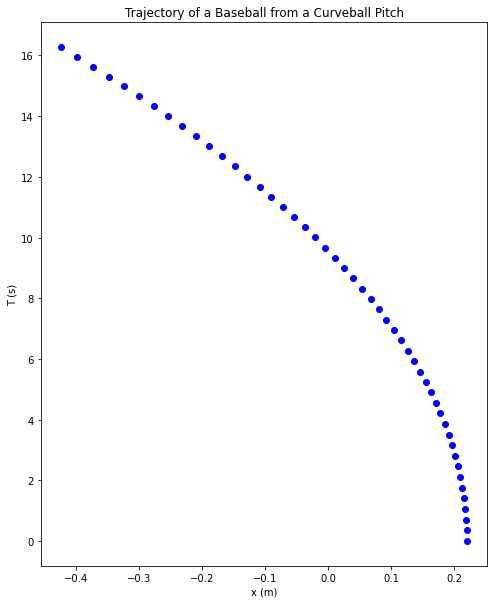

-0.6438981890710603


In [10]:
t = 0 #time in s
h = .01 #time step in s

# initial position and velocity components
x = .22
y = 0
z = 1.88
vx = 0 
vy = vmag0*np.cos(theta)   
vz = vmag0*np.sin(theta) 

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x)
ylist.append(y)
zlist.append(z)

data = np.array([x,y,z,vx,vy,vz])

# compute
while y < 16.2:
   
    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h
   
    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
   
# Plot the trajectory
plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()

print(xlist[-1]-xlist[0])